# Хакатон: Maths&Stats

### Изработено од група 2: Андреа Таневски, Давид Богдановски, Јован Љаткоски, Тамара Јовановска
### Нарачател: "Тхе Болница", Др. Игор Панчевски

In [1]:
# Импортирање на потребните библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#import ipympl

## Задача 1

Од податоците кои ги прибирал Др. Игор Панчевски, сака да заклучи дали еден лек, кој го даваат на пациенти во “Тхе Болница”, им помогнал. Пациентите кои биле вклучени во испитувањето имаат покачен крвен притисок (се разгледува само систола) и се претпоставува лекот дека го намалува покачениот притисок.

Прибрани се податоци за 100 пациенти, дадени во 'Prva_zadaca.csv'

Колоната ‘Merenje 1’ претставува измерен притисок на прв ден од испитување.

Колоната ‘Merenje 2’ претставува измерен притисок после 6 месеци.

Колоната ‘Primil lek ili ne’ е категориска (0 или 1), односно кажува дали некој пациент добил (или не) лек за намалување на крвниот притисок.

а) Изберете начин на кој ќе ги визуелизирате податоците и напишете коментари за нив (краток текстуален опис и коментари за plots).

б) Категоризирајте ги податоците и направете Descriptive Statistics за променливите кои се добиени.

в) Направете тестови за групите:

в-1) Заклучете дали постои разлика на измерен крвен притисок на пациентите прв ден и измерен крвен притисок на пациенти последен ден.

в-2) Заклучете дали постои намалување (или зголемување) на притисокот кај пациенти кои примиле лек во првиот ден од мерењето и на крајот од 6 месеци.

в-3) Заклучете дали постои намалување (или зголемување) на притисокот кај пациенти кои не примиле лек во првиот ден од мерењето и на крајот од 6 Месеци.

в-4) Дали постои разлика измеѓу пациентите што примиле лек и пациентите што не примиле лек?

In [2]:
#Вчитување на податоците 
prva = pd.read_csv('Prva_zadaca.csv')
del prva['Unnamed: 0'] 

In [3]:
#Поделба на податоците на пациенти кои примиле вистински лек и пациенти кои примиле "placebo" лек
prva_da = prva[prva['Primil lek ili ne'] == 1][['Merenje 1', 'Merenje 2']]
display(prva_da)

prva_ne = prva[prva['Primil lek ili ne'] == 0][['Merenje 1', 'Merenje 2']]
display(prva_ne)

,Merenje 1,Merenje 2
0,151.354987,128.022177
2,149.398011,123.352114
4,146.130695,111.255393
8,147.533378,98.054923
9,148.171633,120.088049
13,140.241112,106.551472
14,135.536433,100.569464
16,166.235555,144.401990
19,151.803983,92.455833
20,150.175032,121.862492


,Merenje 1,Merenje 2
1,140.893229,142.951676
3,145.447638,144.392613
5,133.452547,140.628104
6,163.647067,160.288593
7,131.848202,129.584912
10,149.314681,148.503494
11,166.041056,158.684764
12,143.411232,147.219977
15,152.266371,145.271200
17,157.388071,151.750538


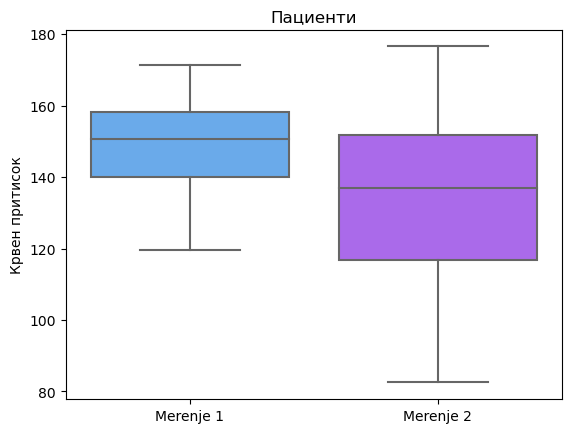

In [4]:
#Визуелизација со помош на box plot на ниво на целиот data frame
plt.figure()
sns.boxplot(data=prva[['Merenje 1', 'Merenje 2']], palette="cool") 
plt.ylabel('Крвен притисок')
plt.title('Пациенти')
plt.show()

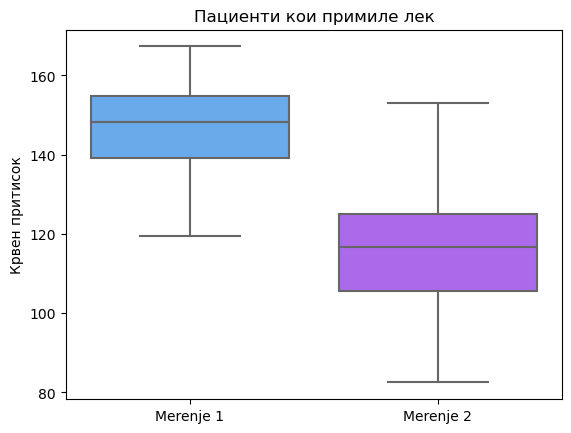

In [5]:
#Визуелизација со помош на box plot за пациенти кои го примиле лекот
plt.figure()
sns.boxplot(data=prva_da, palette="cool") 
plt.ylabel('Крвен притисок')
plt.title('Пациенти кои примиле лек')
plt.show()

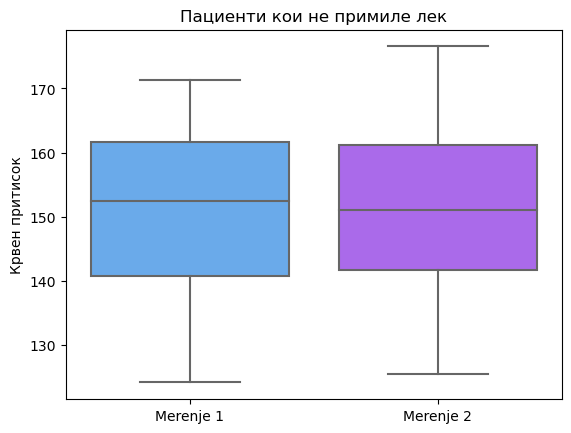

In [6]:
#Визуелизација со помош на box plot за пациенти кои не го примиле лекот
plt.figure()
sns.boxplot(data=prva_ne, palette="cool")
plt.ylabel('Крвен притисок')
plt.title('Пациенти кои не примиле лек')
plt.show()

In [7]:
#Десктиптивна статистика

print('Дескриптивна статистика за целиот data frame')
display(prva[['Merenje 1', 'Merenje 2']].describe())
print()

print('Дескриптивна статистика за податоците кои се однесуваат на пациентите што го примиле лекот')
display(prva_da.describe())
print()

print('Дескриптивна статистика за податоците кои се однесуваат на пациентите што не го примиле лекот')
display(prva_ne.describe())
print()


Дескриптивна статистика за целиот data frame


,Merenje 1,Merenje 2
count,100.000000,100.000000
mean,149.383047,133.534419
std,11.442346,22.500510
min,119.488833,82.505925
25%,140.149544,116.704885
50%,150.708728,137.011075
75%,158.317202,151.804897
max,171.349918,176.539961



Дескриптивна статистика за податоците кои се однесуваат на пациентите што го примиле лекот


,Merenje 1,Merenje 2
count,50.000000,50.000000
mean,147.655433,116.170331
std,11.031656,16.286455
min,119.488833,82.505925
25%,139.066614,105.621257
50%,148.346144,116.652595
75%,154.720659,125.137700
max,167.308936,153.017268



Дескриптивна статистика за податоците кои се однесуваат на пациентите што не го примиле лекот


,Merenje 1,Merenje 2
count,50.000000,50.000000
mean,151.110662,150.898506
std,11.693501,11.928946
min,124.124567,125.428249
25%,140.756809,141.671721
50%,152.422849,151.078483
75%,161.568132,161.247244
max,171.349918,176.539961


### Краток заклучок врз основа на визуелизации и дескриптивна статистика:
Според гореприкажаното може да се заклучи дека:

Доколку се разгледува целиот dataset може да се воочи разлика во податоците измеѓу првото и второто мерење.

Средната вредност за првото мерење е 149.383047, а за второто 133.534419.

Кога ги разгледуваме само пациентите кои го примиле вистинскиот лек, средната вредност за првото мерење е 147.655433, а по 6 месеци терапија средната вредност е 116.170331.

За пациентите кои не го примиле лекот средната вредност при првото мерење е 151.110662, а по 6 месеци 150.898506.

Овие резултати се совпаѓаат и со прикажаното на визуелизациите.

Останатите податоци за стандардна девијација, минимални, максимални вредности и поделба по квартали може да се прочитаат од табелите.

Сето ова укажува дека лекот со голема веројатност има позитивен ефект при намалување на високиот крвен притисок, бидејќи кај пациентите кои го примиле лекот средната вредност покажува значително намалување по 6 месеци терапија, додека пак кај оние кои не примиле лек, средната вредност е речиси еднаква и за двете мерења.

За да се докажат овие тврдења, потребно е да се направат одредени статистички тестови, кои ќе бидат дадени во продолжение.

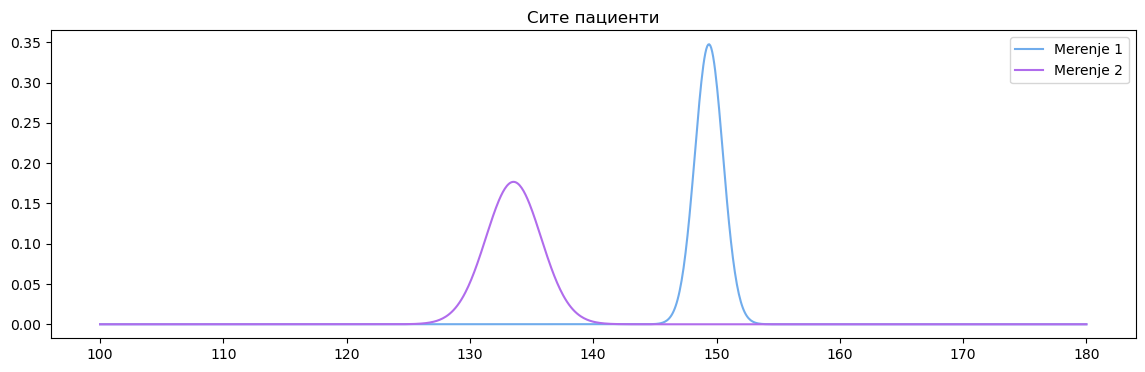

p-value =  3.643033269815961e-09
Има значителна разлика во крвниот притисок во двете мерења за сите пациенти.


In [8]:
# Барање в1) Цел dataset
# Хипотези
# H0: Merenje 1 = Merenje 2   <--- Лекот нема ефект врз крвниот притисок
# Ha: Merenje 1 != Merenje 2   <--- Лекот има ефект врз крвниот притисок

mean_m1 = np.mean(prva['Merenje 1'])
mean_m2 = np.mean(prva['Merenje 2'])

std_m1 = np.std(prva['Merenje 1'], ddof = 1)
se_m1 = stats.sem(prva['Merenje 1'])

std_m2 = np.std(prva['Merenje 2'], ddof = 1)
se_m2 = stats.sem(prva['Merenje 2'])

T_m1 = stats.t(df = prva['Merenje 1'].size - 1, loc = mean_m1, scale = se_m1)
T_m2 = stats.t(df = prva['Merenje 2'].size - 1, loc = mean_m2, scale = se_m2)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(14, 4))
plt.plot(xs, T_m1.pdf(xs), label='Merenje 1', color='#70acec')
plt.plot(xs, T_m2.pdf(xs), label='Merenje 2', color='#b06cec')
plt.title('Сите пациенти')
plt.legend()
plt.show()

p = stats.ttest_ind(prva['Merenje 1'], prva['Merenje 2'], alternative = 'two-sided', equal_var = False)[1]
print('p-value = ', p)
if p < 0.05:
    print('Има значителна разлика во крвниот притисок во двете мерења за сите пациенти.')
else:
    print('Нема значителна разлика во крвниот притисок во двете мерења за сите пациенти.')


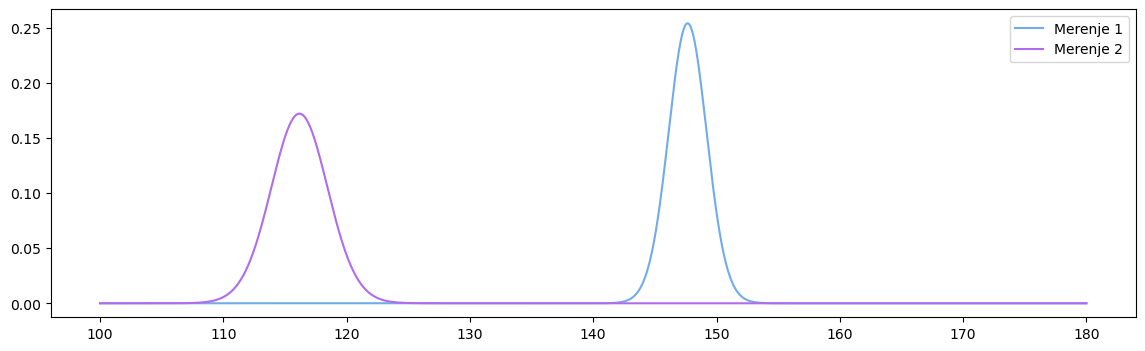

p-value =  9.979494526655533e-19
Има значителна разлика во крвниот притисок во двете мерења за пациентите кои го примиле вистинскиот лек.


In [9]:
# Барање в2) Пациенти кои примиле лек
# hypotheses
# H0: Merenje 1 = Merenje 2   <--- Лекот нема ефект врз крвниот притисок
# Ha: Merenje 1 != Merenje 2   <--- Лекот има ефект врз крвниот притисок

mean_m1_da = np.mean(prva_da['Merenje 1'])
mean_m2_da = np.mean(prva_da['Merenje 2'])

std_m1_da = np.std(prva_da['Merenje 1'], ddof = 1)
se_m1_da = stats.sem(prva_da['Merenje 1'])

std_m2_da = np.std(prva_da['Merenje 2'], ddof = 1)
se_m2_da = stats.sem(prva_da['Merenje 2'])

T_m1_da = stats.t(df = prva_da['Merenje 1'].size - 1, loc = mean_m1_da, scale = se_m1_da)
T_m2_da = stats.t(df = prva_da['Merenje 2'].size - 1, loc = mean_m2_da, scale = se_m2_da)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(14, 4))
plt.plot(xs, T_m1_da.pdf(xs), label='Merenje 1', color='#70acec')
plt.plot(xs, T_m2_da.pdf(xs), label='Merenje 2', color='#b06cec')
plt.legend()
plt.show()

p = stats.ttest_ind(prva_da['Merenje 1'], prva_da['Merenje 2'], alternative = 'two-sided', equal_var = False)[1]
print('p-value = ', p)
if p < 0.05:
    print('Има значителна разлика во крвниот притисок во двете мерења за пациентите кои го примиле вистинскиот лек.')
else:
    print('Нема значителна разлика во крвниот притисок во двете мерења за пациентите кои го примиле вистинскиот лек.')

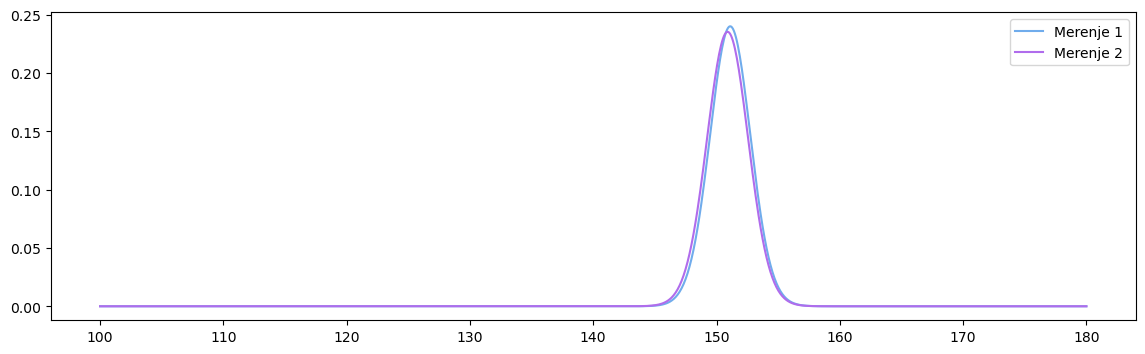

p-value =  0.9286242088218923
Нема значителна разлика во крвниот притисок во двете мерења за пациентите кои не го примиле лекот.


In [10]:
# Пациенти кои не го примиле лекот
# Хипотези
# H0: Merenje 1 = Merenje 2   <--- Лекот нема ефект врз крвниот притисок
# Ha: Merenje 1 != Merenje 2   <--- Лекот има ефект врз крвниот притисок

mean_m1_ne = np.mean(prva_ne['Merenje 1'])
mean_m2_ne = np.mean(prva_ne['Merenje 2'])

std_m1_ne = np.std(prva_ne['Merenje 1'], ddof = 1)
se_m1_ne = stats.sem(prva_ne['Merenje 1'])

std_m2_ne = np.std(prva_ne['Merenje 2'], ddof = 1)
se_m2_ne = stats.sem(prva_ne['Merenje 2'])

T_m1_ne = stats.t(df = prva_ne['Merenje 1'].size - 1, loc = mean_m1_ne, scale = se_m1_ne)
T_m2_ne = stats.t(df = prva_ne['Merenje 2'].size - 1, loc = mean_m2_ne, scale = se_m2_ne)

xs = np.linspace(100, 180, 1000)
plt.figure(figsize=(14, 4))
plt.plot(xs, T_m1_ne.pdf(xs), label='Merenje 1', color='#70acec')
plt.plot(xs, T_m2_ne.pdf(xs), label='Merenje 2', color='#b06cec')
plt.legend()
plt.show()

p = stats.ttest_ind(prva_ne['Merenje 1'], prva_ne['Merenje 2'], alternative = 'two-sided', equal_var = False)[1]
print('p-value = ', p)
if p < 0.05:
    print('Има значителна разлика во крвниот притисок во двете мерења за пациентите кои не го примиле лекот.')
else:
    print('Нема значителна разлика во крвниот притисок во двете мерења за пациентите кои не го примиле лекот.')



### Заклучок по извршени статистички тестови

Според резултатите добиени од t-тестовите погоре:

Вредноста за p за сите пациенти е 3.643033269815961e-09, поради што се отфрла нултата хипотеза и се прифаќа алтернативната, која што укажува дека лекот има ефект врз крвниот притисок.

Вредноста за p за пациентите кои го примиле лекот е 9.979494526655533e-19, поради што и во овој случај се отфрла нултата хипотеза и се прифаќа алтернативната, која што укажува дека лекот има ефект врз крвниот притисок.

Вредноста за p за пациентите кои го примиле лекот е 0.9286242088218923, па во овој случај се прифаќа нултата хипотеза која вели дека нема значителна разлика во крвниот притисок кај пациентите кои не го примиле лекот.

Врз основа на ова генерален заклучок е дека постои разлика кај пациентите кои го примиле лекот и кај оние што не го примиле лекот. Односно, кај оние кои го примиле, крвниот притисок се намалил по 6 месеци, а кај оние кои не го примиле, крвниот притисок останал на исто ниво и по 6 месеци.

## Задача 2

Др. Панчевски добил и втори податоци после првото испитување. Параметрите на испитувањето биле сосема исти, но, податоците за дали некој пациент во испитувањето примил лек или не ги загубиле.

а) Користејѓи ги податоците од ‘Prva_zadaca.csv’, конструирајте (истренирајте) алгоритам за класификација на податоците. Категоризирајте ги пациентите во 2 групи - 0 (не примил лек) и 1 (примил лек). Потоа, за податоците од ‘Vtora_zadaca.csv’:

а-1) Категоризирајте ги пациентите само во однос на првото извршено мерење.

а-2) Категоризирајте ги пациентите само во однос на второто извршено мерење.

а-3) Категоризирајте ги пациентите во однос на првото и второто мерење.

а-4) За категоризациите под а-1), а-2) и а-3), споредете ја прецизноста на моделите, коментирајте (краток текстуален опис) и визуелизирајте ги податоците (2D / 3D - соодветно во python, напишете коментари за plots)

In [11]:
vtora = pd.read_csv('Vtora_zadaca.csv')
del vtora['Unnamed: 0']
vtora.head()

,Merenje 1,Merenje 2
0,163.419762,156.977602
1,154.133336,127.545654
2,144.966965,144.371136
3,150.545838,150.807626
4,153.743813,148.645986


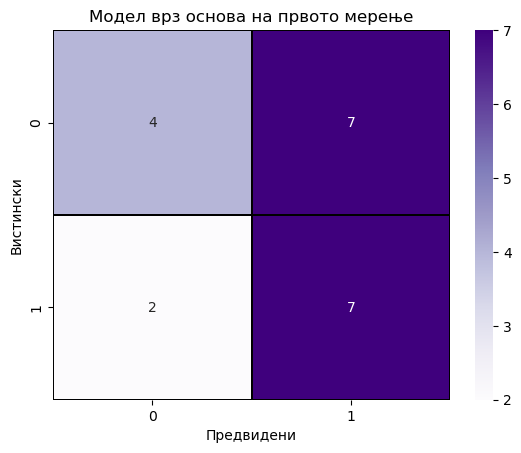


Mean Accuracy: 0.55
The mean accuracy for m1 is  0.55
precision m1=  0.5
recall m1 =  0.7777777777777778
f1 m1 =  0.6086956521739131


In [12]:
#Модел врз основа на првото мерење
y_m1 = prva['Primil lek ili ne'].to_numpy()
X_m1 = prva['Merenje 1'].to_numpy().reshape(-1,1)

X_pred_m1 = vtora['Merenje 1'].to_numpy().reshape(-1,1)

X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(X_m1, y_m1, test_size=0.2, random_state=1234)

model_m1 = LogisticRegression()
model_m1.fit(X_train_m1, y_train_m1)

y_pred_m1 = model_m1.predict(X_test_m1)

cm_m1 = confusion_matrix(y_test_m1, y_pred_m1)
sns.heatmap(cm_m1, annot=True, fmt='d', cmap='Purples', linewidths=0.1, linecolor='black')  # Set linewidths and linecolor
plt.xlabel('Предвидени')
plt.ylabel('Вистински')
plt.title('Модел врз основа на првото мерење')
plt.show()


acc_m1 = accuracy_score(y_test_m1, y_pred_m1)
print(f"\nMean Accuracy: {acc_m1}")

vtora["Merenje 1 Kategorizacija"] = model_m1.predict(X_pred_m1)

# print(vtora['Merenje 1'].mean())
# print(vtora['Merenje 2'].mean())

# vtora[["Merenje 1", "Merenje 1 Kategorizacija"]].head(60)

# Stating the score
mean_accuracy_m1 = model_m1.score(X_test_m1, y_test_m1)
print('The mean accuracy for m1 is ', mean_accuracy_m1)

precision_m1 = precision_score(y_test_m1, y_pred_m1)
recall_m1 = recall_score(y_test_m1, y_pred_m1)
f1_m1 = f1_score(y_test_m1, y_pred_m1)

print('precision m1= ', precision_m1)
print('recall m1 = ', recall_m1)
print('f1 m1 = ', f1_m1)



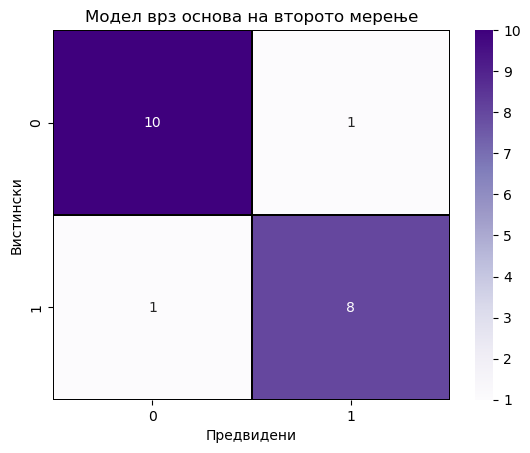


Mean Accuracy: 0.9
The mean accuracy for m2 is  0.9
precision m2=  0.8888888888888888
recall m2 =  0.8888888888888888
f1 m2 =  0.8888888888888888


In [13]:
#Модел врз основа на второто мерење

y_m2 = prva['Primil lek ili ne'].to_numpy()
X_m2 = prva['Merenje 2'].to_numpy().reshape(-1,1)

X_pred_m2 = vtora['Merenje 2'].to_numpy().reshape(-1,1)

X_train_m2, X_test_m2, y_train_m2, y_test_m2 = train_test_split(X_m2, y_m2, test_size=0.2, random_state=1234)

model_m2 = LogisticRegression()
model_m2.fit(X_train_m2, y_train_m2)

y_pred_m2 = model_m2.predict(X_test_m2)

cm_m2 = confusion_matrix(y_test_m2, y_pred_m2)
sns.heatmap(cm_m2, annot=True, fmt='d', cmap='Purples', linewidths=0.1, linecolor='black')  # Set linewidths and linecolor
plt.xlabel('Предвидени')
plt.ylabel('Вистински')
plt.title('Модел врз основа на второто мерење')
plt.show()

acc_m2 = accuracy_score(y_test_m2, y_pred_m2)
print(f"\nMean Accuracy: {acc_m2}")

vtora["Merenje 2 Kategorizacija"] = model_m2.predict(X_pred_m2)
vtora[["Merenje 2", "Merenje 2 Kategorizacija"]].head(60)

# print(vtora['Merenje 1'].mean())
# print(vtora['Merenje 2'].mean())

# Stating the score
mean_accuracy_m2 = model_m2.score(X_test_m2, y_test_m2)
print('The mean accuracy for m2 is ', mean_accuracy_m2)

precision_m2 = precision_score(y_test_m2, y_pred_m2)
recall_m2 = recall_score(y_test_m2, y_pred_m2)
f1_m2 = f1_score(y_test_m2, y_pred_m2)

print('precision m2= ', precision_m2)
print('recall m2 = ', recall_m2)
print('f1 m2 = ', f1_m2)

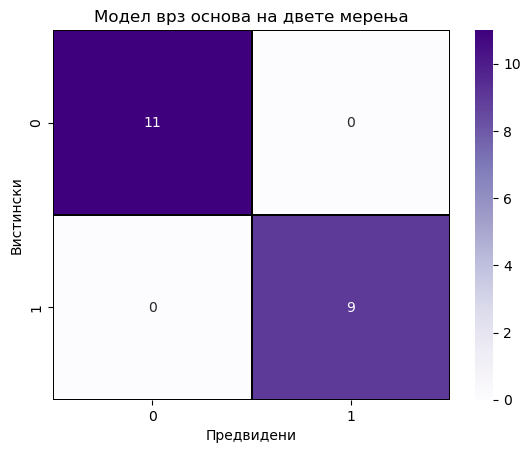


Mean Accuracy: 1.0
The mean accuracy is  1.0
precision =  1.0
recall =  1.0
f1 =  1.0


In [14]:
#Модел врз основа на двете мерења
y = prva['Primil lek ili ne'].to_numpy()
X = prva[['Merenje 1', 'Merenje 2']].to_numpy()

X_pred = vtora[['Merenje 1', 'Merenje 2']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', linewidths=0.1, linecolor='black')  # Set linewidths and linecolor
plt.xlabel('Предвидени')
plt.ylabel('Вистински')
plt.title('Модел врз основа на двете мерења')
plt.show()

acc = accuracy_score(y_test, y_pred)
print(f"\nMean Accuracy: {acc}")

vtora["Kategorizacija"] = model.predict(X_pred)

# Stating the score
mean_accuracy = model.score(X_test, y_test)
print('The mean accuracy is ', mean_accuracy)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('precision = ', precision)
print('recall = ', recall)
print('f1 = ', f1)

#vtora.head(60)
# vtora[["Merenje 1", "Merenje 1 Kategorizacija"]].head(60)

### Заклучок за логистичка регресија 
Кога работиме со двете мерења, нашиот модел предвидува максимална точност, за разлика при работење со само една група на мерење

Подоцна со додавање на повеќе податоци на моделот, се зголемува точноста

Најмала точност има моделот со податоците од Мерење 1, што е и логично, бидејќи на почетокот крвниот притисок на сите пациенти им е сличен

За подобра визуелизација, изработен е 3D scatter, кој може да се погледне во фајлот Hackaton_3D_Group2.

Врз основа на ова, иако податоците за дали некој пациент во испитувањето примил лек или не се загубиле, "Тхе болница" користејќи го моделот добиен со логистичка регресија може со голема сигурност повторно да ги категоризира пациентите. 

### Бонус:
Дали може да се категоризираат податоците со помош на линеарна регресија?

Кои колони би требало да се искористат за тренирање на моделот во овој случај (на податоците од ‘Prva_zadaca.csv’’? Конструирајте линеарна регресија за истата категоризација на пациентите од ‘Vtora_zadaca.csv’. Колку е R2? Дали може да се подобри овој score? Од што зависи нашиот score во ова сценарио?

Mean Absolute Error = 0.25
Coefficient = -0.02
Intercept = 2.81
R² = 0.6
R = 0.78


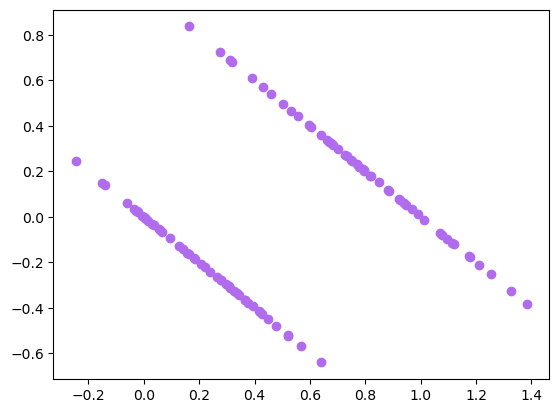

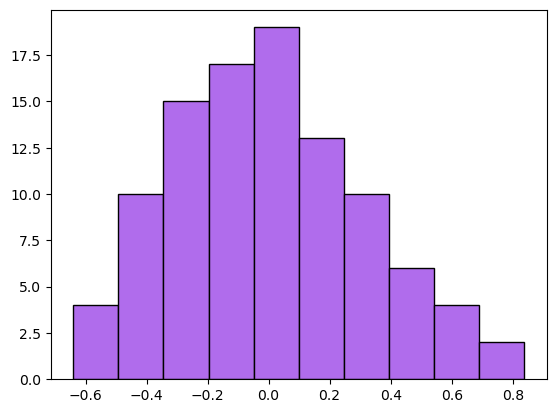

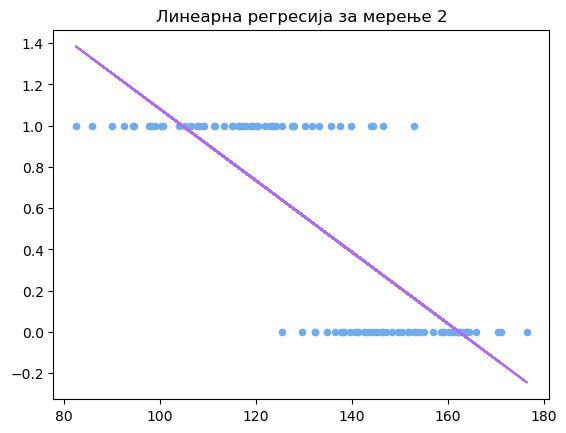

In [15]:
#Линеарна регресија за мерење два
X_linear = prva['Merenje 2'].to_numpy().reshape(-1, 1)
y_linear = prva['Primil lek ili ne'].to_numpy()

model_linear = LinearRegression()
model_linear.fit(X_linear,y_linear)

y_pred_linear = model_linear.predict(X_linear)

mae = mean_absolute_error(y_linear, y_pred_linear)
print('Mean Absolute Error =', round(mae,2))

print('Coefficient =', round(model_linear.coef_[0],2))
print('Intercept =', round(model_linear.intercept_,2))

r_sq = model_linear.score(X_linear,y_linear)
r = np.sqrt(r_sq)
print('R² =', round(r_sq,2))
print('R =', round(r,2))
#Evalutation of the model
y_pred_linear = model_linear.predict(X_linear)
resid = y_linear - y_pred_linear

# Residual plot and the distribution of the residuals

plt.figure()
plt.scatter(y_pred_linear, resid, color='#b06cec')
plt.show()

plt.figure()
plt.hist(resid, color='#b06cec', edgecolor = 'k')
plt.show()

plt.scatter(X_linear,y_linear, s = 20, color='#70acec')
plt.title('Линеарна регресија за мерење 2')
plt.plot(X_linear,y_pred_linear, color = '#b06cec')
plt.show()


In [16]:
prva['Kategorizacija od Linearna regresija 1'] = ''

for i in range(prva['Kategorizacija od Linearna regresija 1'].size):
    if y_pred_linear[i] < 0.5:
        prva.at[i, 'Kategorizacija od Linearna regresija 1'] = 0
    else:
        prva.at[i, 'Kategorizacija od Linearna regresija 1'] = 1
        
print(f'Користејќи линеарен модел со "Merenje 2" и "Primil lek ili ne" добиваме {len(prva[prva["Primil lek ili ne"] != prva["Kategorizacija od Linearna regresija 1"]])} разлики меѓу реалните категории и добиените со линеарниот модел.')

Користејќи линеарен модел со "Merenje 2" и "Primil lek ili ne" добиваме 11 разлики меѓу реалните категории и добиените со линеарниот модел.


Mean Absolute Error = 0.21
Coefficients = [0.02, -0.02]
Intercept = 0.69
R² =  0.73
R = 0.85


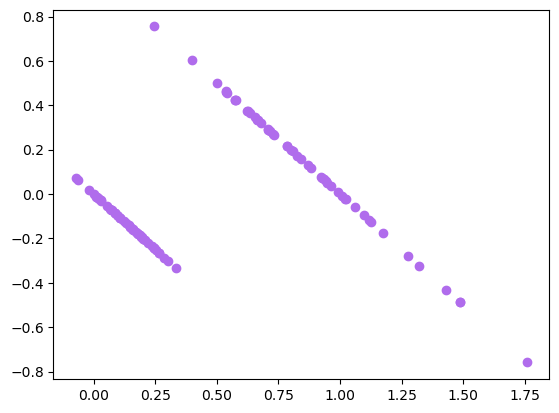

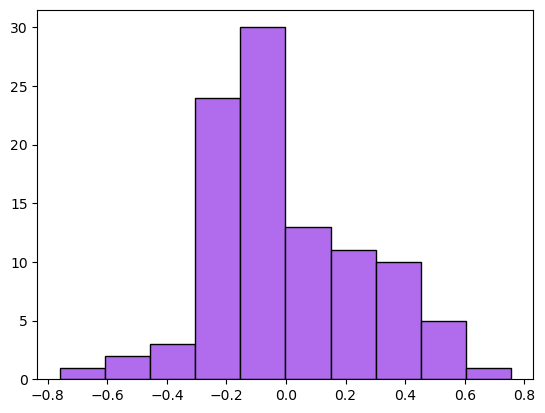

In [17]:
#Линеарна регресија за двете мерења
X_linear = prva[['Merenje 1', 'Merenje 2']].to_numpy()
y_linear = prva['Primil lek ili ne'].to_numpy()

model_linear = LinearRegression()
model_linear.fit(X_linear,y_linear)

y_pred_linear = model_linear.predict(X_linear)

mae = mean_absolute_error(y_linear, y_pred_linear)
print('Mean Absolute Error =', round(mae,2))

print('Coefficients =', [round(x,2) for x in model_linear.coef_])
print('Intercept =', round(model_linear.intercept_,2))

r_sq = model_linear.score(X_linear,y_linear)
r = np.sqrt(r_sq)
print('R² = ', round(r_sq,2))
print('R =', round(r,2))
#Evalutation of the model
y_pred_linear = model_linear.predict(X_linear)
resid = y_linear - y_pred_linear

# Residual plot and the distribution of the residuals

plt.figure()
plt.scatter(y_pred_linear, resid, color='#b06cec')
plt.show()

plt.figure()
plt.hist(resid, color='#b06cec', edgecolor = 'k')
plt.show()


In [18]:
prva['Kategorizacija od Linearna regresija 2'] = ''

for i in range(prva['Kategorizacija od Linearna regresija 2'].size):
    if y_pred_linear[i] < 0.5:
        prva.at[i, 'Kategorizacija od Linearna regresija 2'] = 0
    else:
        prva.at[i, 'Kategorizacija od Linearna regresija 2'] = 1
        
print(f'Користејќи линеарен модел со ["Merenje 1" "Merenje 2"] и "Primil lek ili ne" добиваме {len(prva[prva["Primil lek ili ne"] != prva["Kategorizacija od Linearna regresija 2"]])} разлики меѓу реалните категории и добиените со вториот линеарен модел.')

Користејќи линеарен модел со ["Merenje 1" "Merenje 2"] и "Primil lek ili ne" добиваме 3 разлики меѓу реалните категории и добиените со вториот линеарен модел.


In [19]:
X2_linear = vtora[['Merenje 1', 'Merenje 2']].to_numpy()
y2_pred_linear = model_linear.predict(X2_linear)


vtora['Kategorizacija od Linearna regresija'] = ''

for i in range(vtora['Kategorizacija od Linearna regresija'].size):
    if y2_pred_linear[i] < 0.5:
        vtora.at[i, 'Kategorizacija od Linearna regresija'] = 0
    else:
        vtora.at[i, 'Kategorizacija od Linearna regresija'] = 1
        
print(f'Користејќи линеарен модел со ["Merenje 1" "Merenje 2"] добиваме {len(vtora[vtora["Kategorizacija"] != vtora["Kategorizacija od Linearna regresija"]])} разлики меѓу категориите добиените со логистички модел и вториот линеарен модел.')


Користејќи линеарен модел со ["Merenje 1" "Merenje 2"] добиваме 4 разлики меѓу категориите добиените со логистички модел и вториот линеарен модел.


### Заклучок за линеарна регресија

Според добиените резултати, може да се заклучи дека податоците доволно добро се категоризираат и со линеарна регресија. 

Во првиот случај се користени колоната 'Merenje 2' во комбинација со 'Primil lek ili ne', бидејќи кај пациентите кои примиле лек, вредноста за притисокот колоната 'Merenje 2' е пониска, па моделот може да се истренира. Вредноста за r_sq =  0.6015670021825906, што не е многу висока, но е на долна граница на прифатливост. Разликата помеѓу вистинската класификација и резултатите од оваа регресија е 22 податоци од 100.

За да се подобри вредноста на r_sq, направен е модел со користење на 'Merenje 1' и 'Merenje 2' во комбинација со 'Primil lek ili ne'. Во овој случај добиена е вредност за r_sq =  0.7298606012069613, што е на задоволително ниво. Разликата помеѓу вистинската класификација и резултатите од оваа регресија е 3 податоци од 100.

Со цел да се категоризираат податоците од 'Vtora_zadaca.csv', избрана е границата од 0.5 за y_predicted. Вредностите кои се < 0.5 се категоризираат како 0 - не примил лек, а оние кои се > 0.5 како 1 - примил лек. Со овој начин на класификација, добиени се 4 разлики од 100, помеѓу класификацијата од логистичкита регресија и линеарната регресија.

Забележано е дека има одреден pattern во распоредот на резидуалите, а распределбите не се нормални. Иако резултатите кои се добиваат се генерално задоволителни, сепак препорачуваме користење на логистичка регресија за решавање на ваков тип на проблеми.

### Препораки до пациентите

Високиот крвен притисок е честа здравствена состојба која претставува прикриена и сериозна закана за здравјето. 
Затоа препорачуваме да се избегнуваат стресни ситуации, да се внимава на исхраната, да се спортува.

Доколку природниот начин на одржување на нормален притисок не дава резултати, решението го има Др. Игор Панчевски во својата ординација "Тхе Болница".

Лекот на Др.Панчевски е статистички докажан препарат, што кај пациентите го симнува високиот притисок до ниво на нормален притисок во рок од 6 месеци.

Грижете се за своето здравје и закажете го вашиот термин во "Тхе Болница"!